In [2]:
folder = os.path.join("Z:\\", "Data", "20211012_MW_cabling_testing")

In [3]:
os.listdir(folder)

['C2_tip_out.txt',
 'C2_open_at_top_of_cryo.txt',
 'C2_sample_in.txt',
 'C2_sample_out.txt',
 'C2_tip_in.txt',
 'C2_open_at_cryo_top2.txt']

In [4]:
df_tip_out = pd.read_csv(os.path.join(folder, "C2_tip_out.txt"), skiprows=4)
df_sample_out = pd.read_csv(os.path.join(folder, "C2_sample_out.txt"), skiprows=4)
df_sample_in = pd.read_csv(os.path.join(folder, "C2_sample_in.txt"), skiprows=4)
df_tip_in = pd.read_csv(os.path.join(folder, "C2_tip_in.txt"), skiprows=4)
df_open_at_top_of_cryo = pd.read_csv(os.path.join(folder, "C2_open_at_top_of_cryo.txt"), skiprows=4)
df_open_at_cryo_top2 = pd.read_csv(os.path.join(folder, "C2_open_at_cryo_top2.txt"), skiprows=4)

In [5]:
df_tip_out.columns

Index(['Time', 'Ampl'], dtype='object')

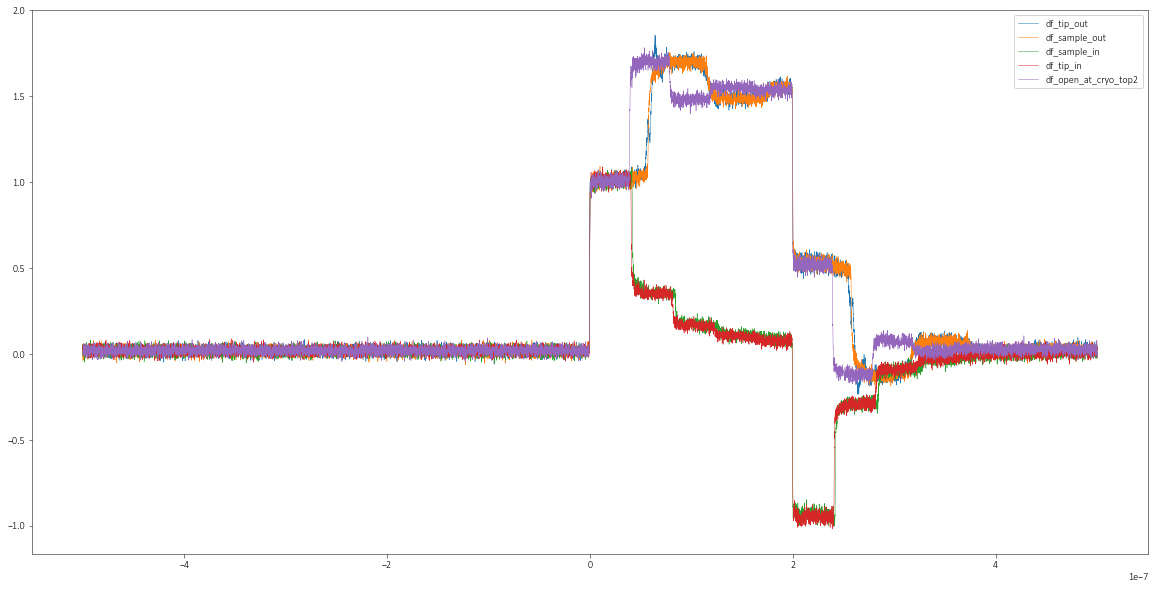

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(df_tip_out["Time"], df_tip_out["Ampl"], linewidth=0.5, label="df_tip_out")
ax.plot(df_sample_out["Time"], df_sample_out["Ampl"], linewidth=0.5, label="df_sample_out")
ax.plot(df_sample_in["Time"], df_sample_in["Ampl"], linewidth=0.5, label="df_sample_in")
ax.plot(df_tip_in["Time"], df_tip_in["Ampl"], linewidth=0.5, label="df_tip_in")
#ax.plot(df_open_at_top_of_cryo["Time"], df_open_at_top_of_cryo["Ampl"], linewidth=0.5, label="df_open_at_top_of_cryo")
ax.plot(df_open_at_cryo_top2["Time"], df_open_at_cryo_top2["Ampl"], linewidth=0.5, label="df_open_at_cryo_top2")

ax.legend()

In [1]:
params, data = sio.extract_data_from_dat(filename="SignalAnalyzer_Spectrum001.dat", folder="Z:\\Data\\20210805_RTStageTestingTip8\\Qnami_FR03-2K14\\")

NameError: name 'sio' is not defined